
# Lab 9: Build a Log Aggregator

In this lab, you will create your own log generator, build a command-line utility that scans log files, summarizes their contents, and provides insight into system behavior. Data structures to track log message levels such as `INFO`, `WARNING`, `ERROR`, and `CRITICAL`.

This lab reinforces:
- File I/O
- Pattern recognition (regex)
- Dictionaries and counters
- Functions and modularity
- CLI arguments, logging



## Part 1: Create Log files (20%)
Using the the following example log format below create a **python file** that will log errors In a structured tree format 

You will find examples in the folder called Logs that you can use to build your program.

Remember set of logs should have a varied levels of log entries (`INFO`, `WARNING`, `ERROR`, `CRITICAL`) and tailored message types for different service components.
You must create 5 structured logs here are some examples:

    sqldb
    ui
    frontend.js
    backend.js
    frontend.flask
    backend.flask

You may use chat GPT to create sample outputs NOT THE LOGS. IE:

    System failure
    Database corruption
    Disk failure detected
    Database corruption


In [ ]:
# Paste your python file here 
# don't forget to upload it with your submission


### Example Log Format

You will work with logs that follow this simplified structure:

```
2025-04-11 23:20:36,913 | my_app | INFO | Request completed
2025-04-11 23:20:36,914 | my_app.utils | ERROR | Unhandled exception
2025-04-11 23:20:36,914 | my_app.utils.db | CRITICAL | Disk failure detected
```


## Part 2: Logging the Log File (40%)
    New File
### Part 2a: Read the Log File (see lab 7) (10%)


Write a function to read the contents of a log file into a list of lines. Handle file errors gracefully.

### Part 2b: Parse Log Lines (see code below if you get stuck) (10%)

Use a regular expression to extract:
- Timestamp
- Log name
- Log level
- Message

### Part 2c: Count Log Levels (20%)

Create a function to count how many times each log level appears. Store the results in a dictionary. Then output it as a Json File
You may pick your own format but here is an example. 
```python
{
    "INFO": 
    {
        "Request completed": 42, 
        "Heartbeat OK": 7
    }

    "WARNING":
    {
        ...
    }
}

```


In [ ]:
# Paste your python file here don't for get to upload it with your submission

In [2]:
# Paste your python file here 
# don't forget to upload it with your submission
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 11.2 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 10.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.6 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.6 MB 10.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.6 MB 10.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 10.8 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



## Step 3: Generate Summary Report (40%)
    New File
### Step 3a (20%):
 Develop a function that continuously monitors your JSON file(s) and will print a real-time summary of log activity. It should keep count of the messages grouped by log level (INFO, WARNING, ERROR, CRITICAL) and display only the critical messages. (I.e. If new data comes in the summary will change and a new critical message will be printed)
 - note: do not reprocess the entire file on each update.  

### Step 3a: Use a Matplotlib (Lecture 10) (20%)
Develop a function that continuously monitors your JSON file(s) and will graph in real-time a bar or pie plot of each of the errors.  (a graph for each log level). 
- The graph should show the distribution of log messages by level  (INFO, WARNING, ERROR, CRITICAL)  


### Critical notes:
- Your code mus use Daemon Threads (Lecture 14)
- 3a and 3b do not need to run at the same time. 


In [ ]:
# Paste your python file here 
# don't forget to upload it with your submission

In [ ]:
# Here is a sample regex that parses a log file and extracts relevant information. 
# you will need to modify it. Review Lecture 11
import re

def parse_log_line(line):
    pattern = r"^(.*?)\s\|\s(\w+)\s\|\s(\w+)\s\|\s(.*)$"
    match = re.match(pattern, line)
   


# ok starting to creat part 1 creat log files

NEW CRITICAL: Disk failure detected (15x)


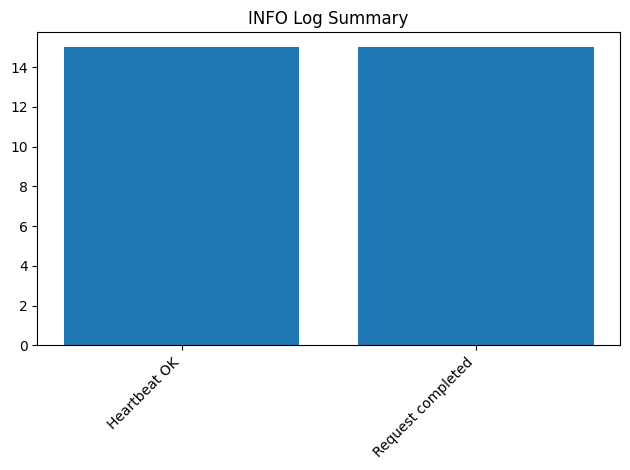

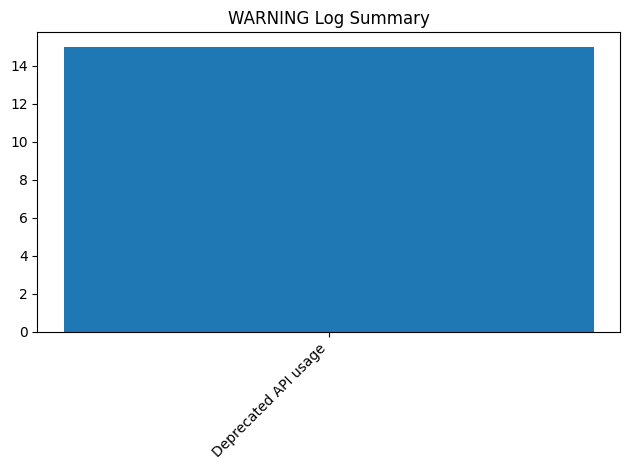

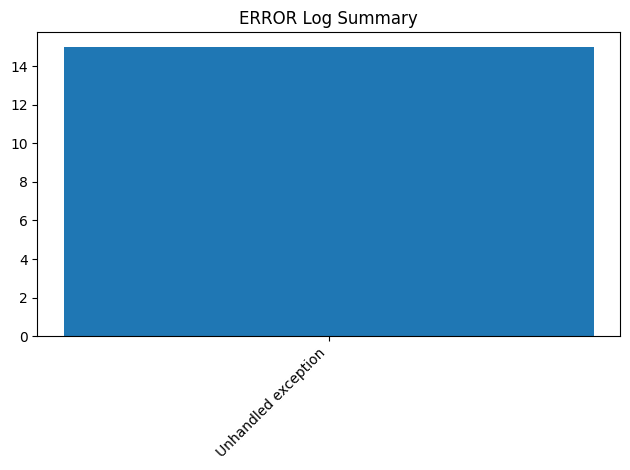

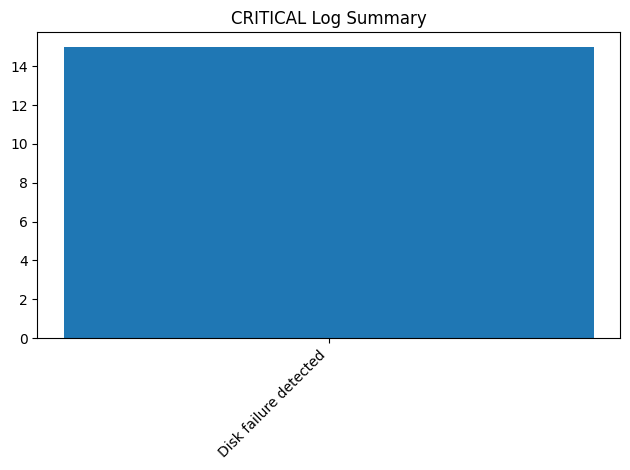

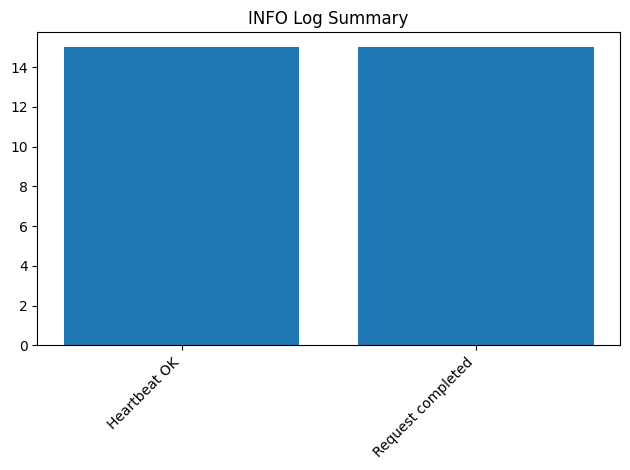

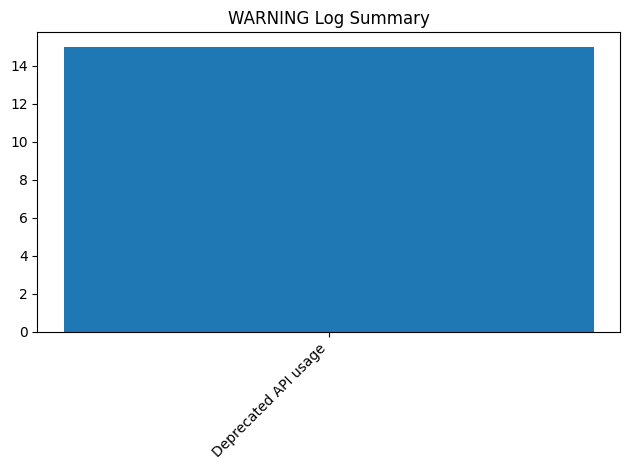

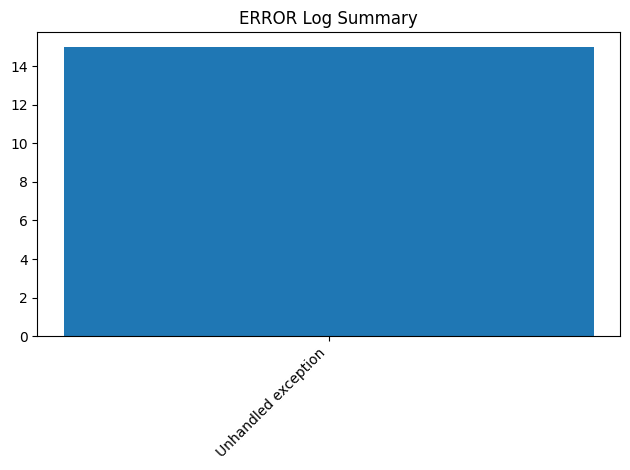

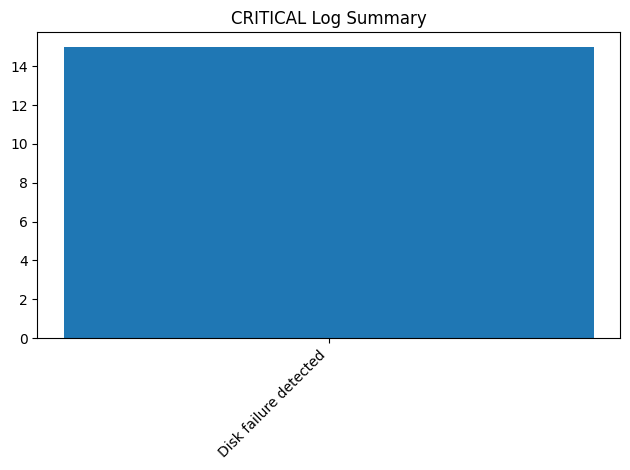

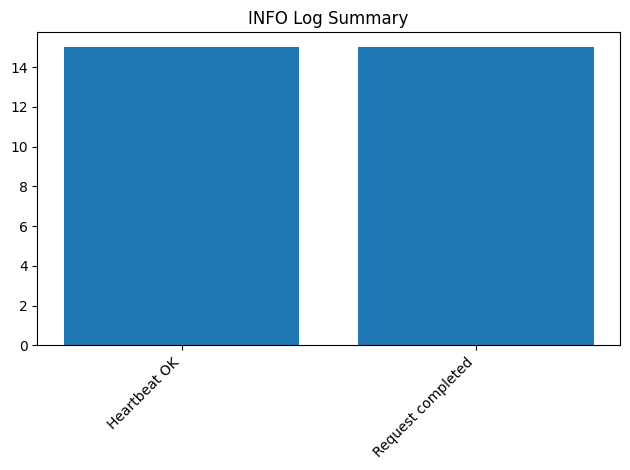

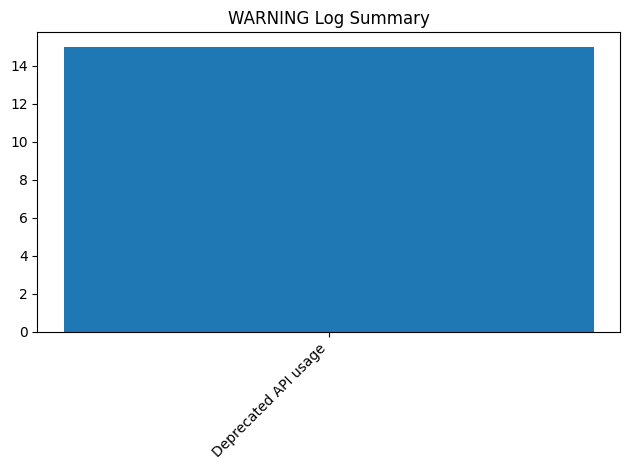

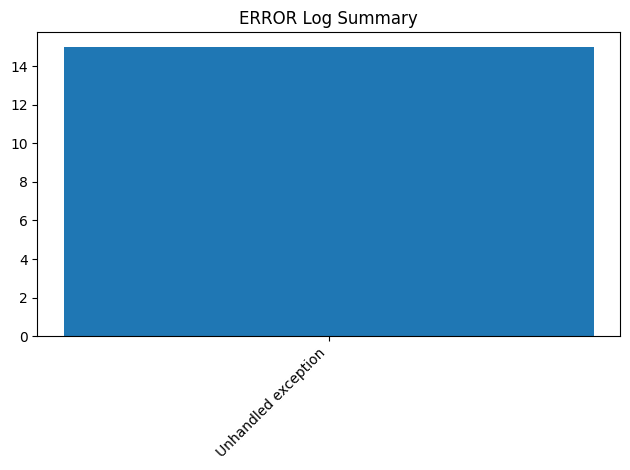

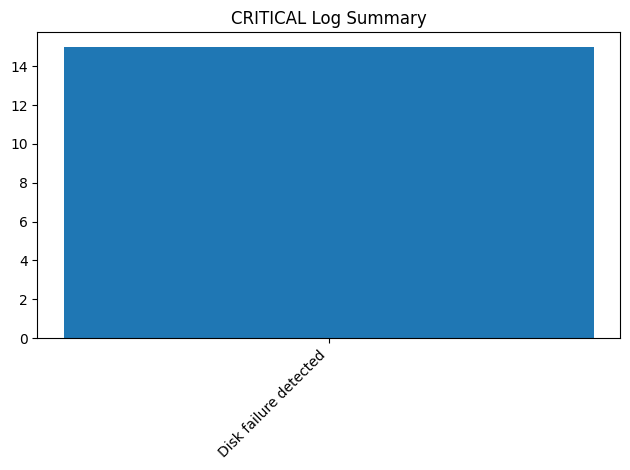

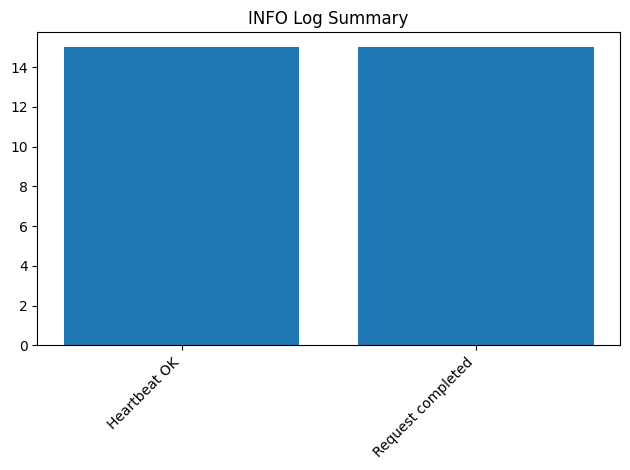

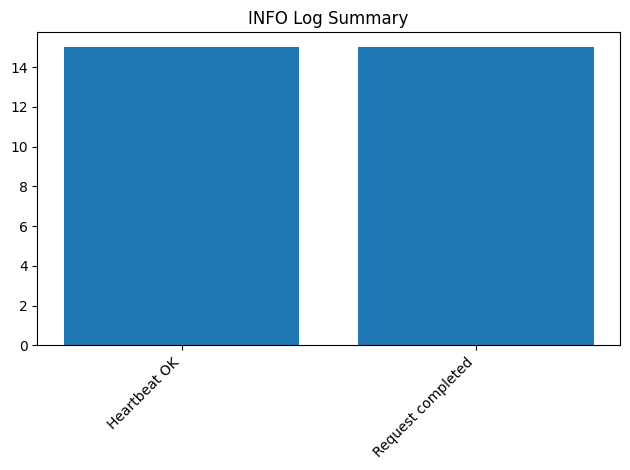

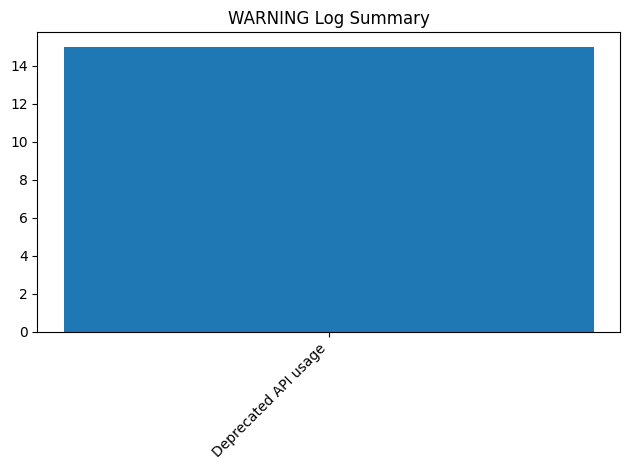

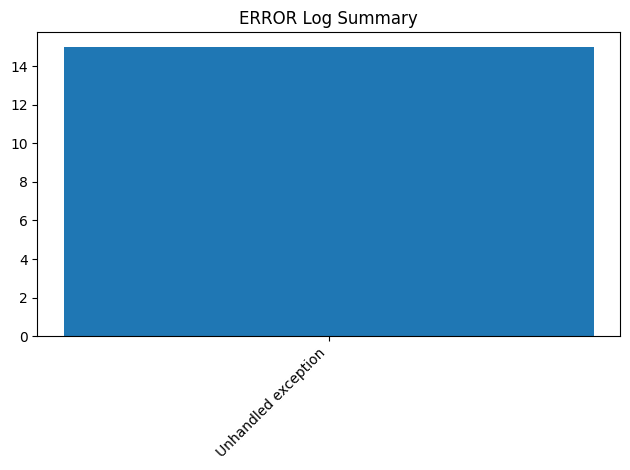

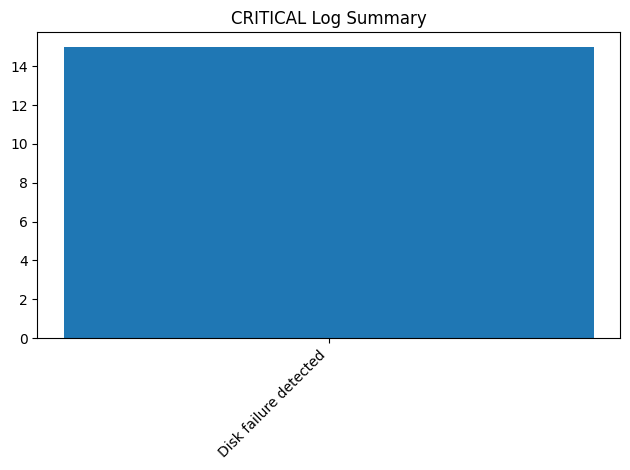

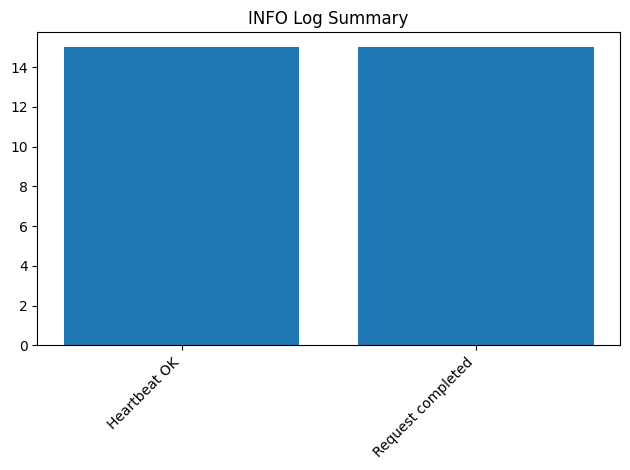

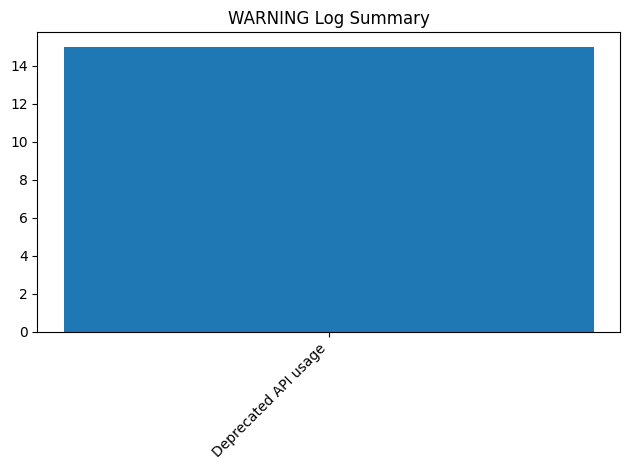

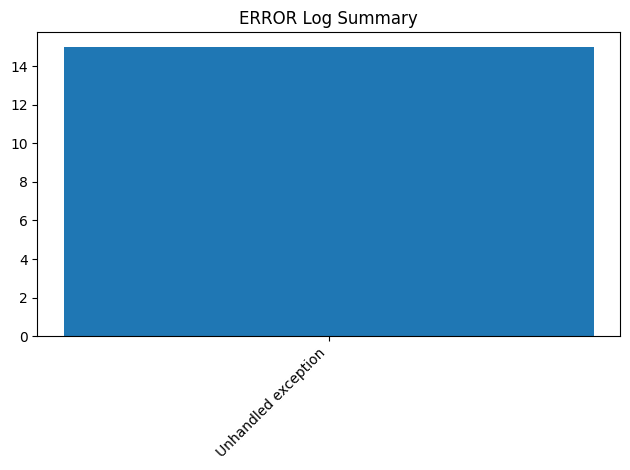

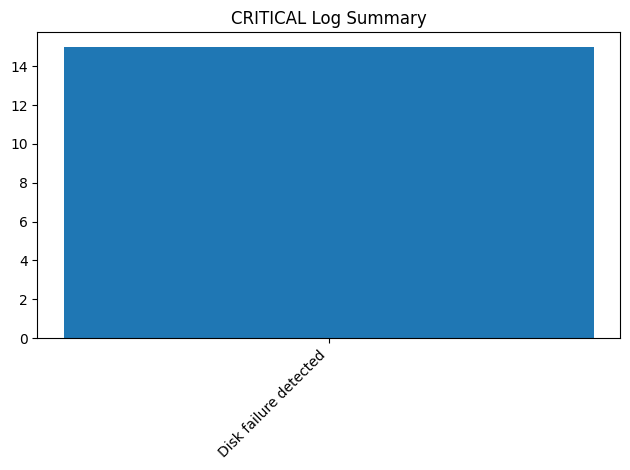

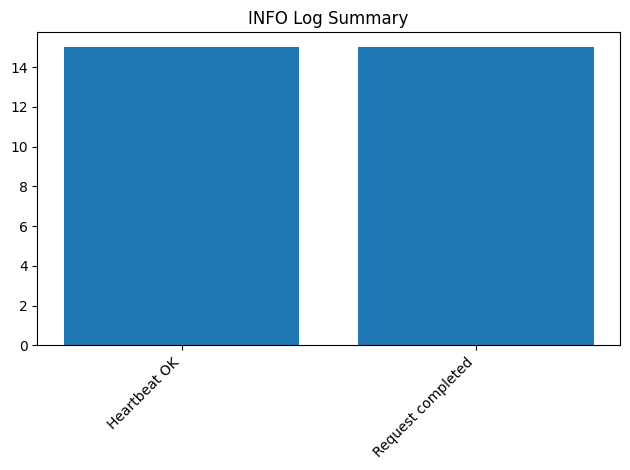

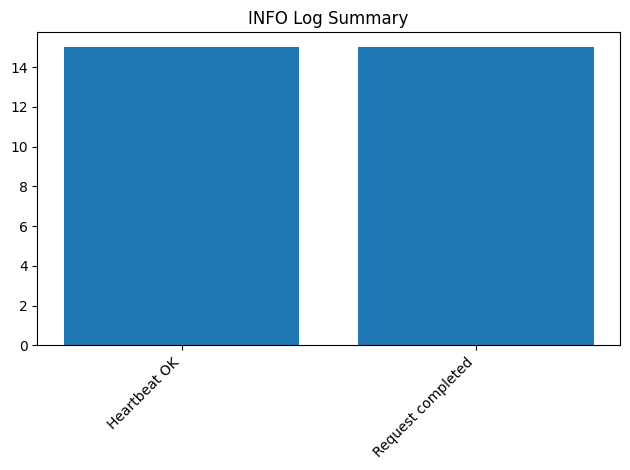

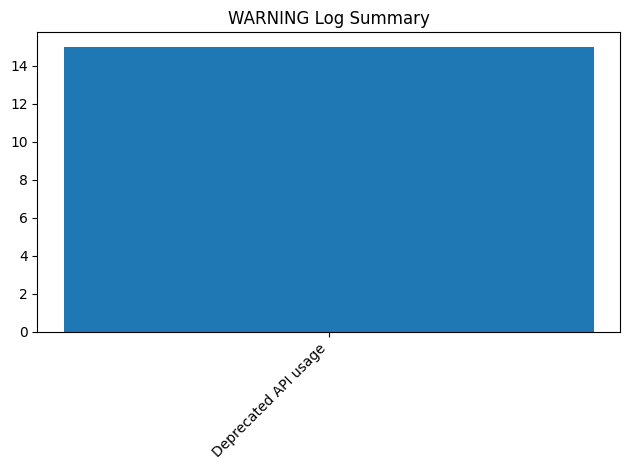

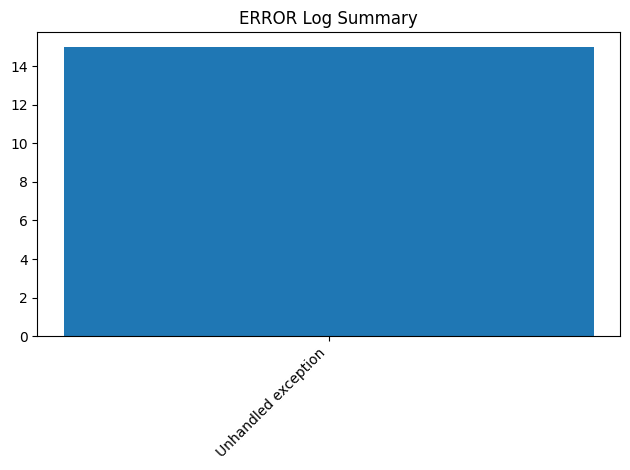

In [ ]:
# =============================
# Lab 9 - Log Aggregator
# Part 1: Generate Structured Log Files
# =============================

import logging
import os
from datetime import datetime

# Define different log components
log_components = ["sqldb", "ui", "frontend.js", "backend.js", "frontend.flask"]

# Setup log folder
log_dir = "generated_logs"
os.makedirs(log_dir, exist_ok=True)

# Define a basic formatter
formatter = logging.Formatter("%(asctime)s | %(name)s | %(levelname)s | %(message)s")

# Sample messages for each level
log_messages = {
    "INFO": ["Heartbeat OK", "Request completed", "Connection established"],
    "WARNING": ["Deprecated API usage", "Disk space low"],
    "ERROR": ["Unhandled exception", "Database timeout"],
    "CRITICAL": ["Disk failure detected", "Memory corruption"]
}

for component in log_components:
    logger = logging.getLogger(component)
    logger.setLevel(logging.DEBUG)
    log_path = os.path.join(log_dir, f"{component}.log")

    handler = logging.FileHandler(log_path)
    handler.setFormatter(formatter)
    logger.addHandler(handler)

    # Generate mixed severity logs for each component
    logger.info(log_messages["INFO"][0])
    logger.info(log_messages["INFO"][1])
    logger.warning(log_messages["WARNING"][0])
    logger.error(log_messages["ERROR"][0])
    logger.critical(log_messages["CRITICAL"][0])

    # Clean up handlers to avoid duplicates
    logger.removeHandler(handler)

# =========================
# Part 2a - Read Log File
# =========================

def read_log_file(filepath):
    try:
        with open(filepath, 'r') as file:
            return file.readlines()
    except FileNotFoundError:
        print(f"Log file {filepath} not found.")
        return []

# =========================
# Part 2b - Parse Log Lines
# =========================

import re

def parse_log_line(line):
    pattern = r"^(.*?) \| (.*?) \| (\w+) \| (.*)$"
    match = re.match(pattern, line)
    if match:
        timestamp, name, level, message = match.groups()
        return timestamp, name, level, message.strip()
    return None

# =========================
# Part 2c - Count Log Levels and Dump to JSON
# =========================

import json
from collections import defaultdict

def count_log_levels(log_lines):
    log_data = defaultdict(lambda: defaultdict(int))
    for line in log_lines:
        parsed = parse_log_line(line)
        if parsed:
            _, _, level, message = parsed
            log_data[level][message] += 1
    return log_data

def write_log_summary_to_json(log_data, output_file):
    with open(output_file, 'w') as json_file:
        json.dump(log_data, json_file, indent=4)

# Process logs for demonstration
all_logs = []
for file in os.listdir(log_dir):
    lines = read_log_file(os.path.join(log_dir, file))
    all_logs.extend(lines)

summary = count_log_levels(all_logs)
write_log_summary_to_json(summary, "log_summary.json")

# =========================
# Step 3a - Monitor JSON and Print Summary
# =========================

import threading
import time

summary_file = "log_summary.json"


def monitor_json_for_critical(file_path):
    seen = set()
    while True:
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                criticals = data.get("CRITICAL", {})
                for message in criticals:
                    if message not in seen:
                        print(f"NEW CRITICAL: {message} ({criticals[message]}x)")
                        seen.add(message)
        except FileNotFoundError:
            pass
        time.sleep(2)

# Daemon thread to monitor criticals
thread = threading.Thread(target=monitor_json_for_critical, args=(summary_file,), daemon=True)
thread.start()

# =========================
# Step 3b - Real-Time Graph with Matplotlib
# =========================

import matplotlib.pyplot as plt

def monitor_and_plot(file_path):
    while True:
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)

            for level, messages in data.items():
                labels = list(messages.keys())
                values = list(messages.values())

                if labels:
                    plt.clf()
                    plt.title(f"{level} Log Summary")
                    plt.bar(labels, values)
                    plt.xticks(rotation=45, ha='right')
                    plt.tight_layout()
                    plt.pause(3)
        except:
            pass
        time.sleep(5)

# To run this separately in another daemon thread (Optional)
# thread_plot = threading.Thread(target=monitor_and_plot, args=(summary_file,), daemon=True)
plt.ion()  # enable interactive mode
monitor_and_plot(summary_file)

# Keep main alive while daemon thread runs
while True:
    time.sleep(5)


# can change out...... # thread_plot.start()
# to this instead for the graph to show ....plt.ion()  # enable interactive mode
                                            monitor_and_plot(summary_file)